In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.activations import *
from tensorflow.keras.datasets import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from matplotlib import pyplot as plt

In [47]:
def create_model():

    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', activation=relu, input_shape=(32, 32, 3)))
    model.add(MaxPool2D(2, 2))

    model.add(Conv2D(64, (3, 3), padding='same', activation=relu))
    model.add(MaxPool2D(2, 2))

    model.add(Conv2D(64, (3, 3), padding='same', activation=relu))
    model.add(MaxPool2D(2, 2))

    model.add(Conv2D(64, (3, 3), padding='same', activation=relu))
    model.add(MaxPool2D(2, 2))

    model.add(Flatten())
    model.add(Dense(10, activation=softmax))

    model.compile(optimizer=Adam(),
                  loss=categorical_crossentropy,
                  metrics=[categorical_accuracy])

    return model

In [48]:
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

In [49]:
print("Before reshaping ...")

print(x_train.shape)
print(y_val.shape)

Before reshaping ...
(50000, 32, 32, 3)
(10000, 1)


In [50]:
y_train = tf.compat.v1.keras.utils.to_categorical(y_train)
y_val = tf.compat.v1.keras.utils.to_categorical(y_val)

In [51]:
x_train = x_train / 255.0
x_val = x_val/ 255.0

In [52]:
print("After reshaping ...")

print(x_train.shape)
print(x_val.shape)

After reshaping ...
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [53]:
m = create_model()
print(m.summary())

history = m.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 64)         

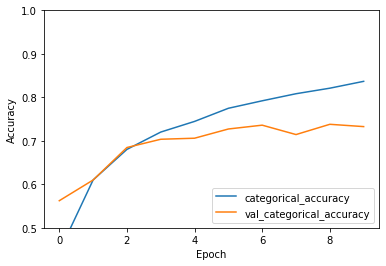

In [54]:
plt.plot(history.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='val_categorical_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [62]:
test_loss, test_acc = m.evaluate(x_val, y_val, verbose=2)
print(test_acc)

predict = m.predict(x_val)
print(predict[10])
print(y_val[10])
print(np.argmax(predict[10]))


10000/1 - 1s - loss: 0.9316 - categorical_accuracy: 0.7327
0.7327
[9.4066089e-01 1.3874502e-04 3.9611668e-03 1.8789628e-04 6.7503820e-03
 8.8109235e-05 3.5605051e-05 2.1555834e-04 4.7800738e-02 1.6095869e-04]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
